In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import cv2
import sklearn
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:


# Set up the data generator
datagen = ImageDataGenerator(rescale=1./255)  # Example: rescale pixel values to [0, 1]

# Load the data
train_data = datagen.flow_from_directory(r'C:\Users\Admin\Desktop\crop_disease_detector\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\train', target_size=(224, 224), batch_size=32, class_mode='categorical')
valid_data = datagen.flow_from_directory(r'C:\Users\Admin\Desktop\crop_disease_detector\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\valid', target_size=(224, 224), batch_size=32, class_mode='categorical')



Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [8]:
categories = list(train_data.class_indices.keys())
print(train_data.class_indices)

{'Apple___Apple_scab': 0, 'Apple___Black_rot': 1, 'Apple___Cedar_apple_rust': 2, 'Apple___healthy': 3, 'Blueberry___healthy': 4, 'Cherry_(including_sour)___Powdery_mildew': 5, 'Cherry_(including_sour)___healthy': 6, 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7, 'Corn_(maize)___Common_rust_': 8, 'Corn_(maize)___Northern_Leaf_Blight': 9, 'Corn_(maize)___healthy': 10, 'Grape___Black_rot': 11, 'Grape___Esca_(Black_Measles)': 12, 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13, 'Grape___healthy': 14, 'Orange___Haunglongbing_(Citrus_greening)': 15, 'Peach___Bacterial_spot': 16, 'Peach___healthy': 17, 'Pepper,_bell___Bacterial_spot': 18, 'Pepper,_bell___healthy': 19, 'Potato___Early_blight': 20, 'Potato___Late_blight': 21, 'Potato___healthy': 22, 'Raspberry___healthy': 23, 'Soybean___healthy': 24, 'Squash___Powdery_mildew': 25, 'Strawberry___Leaf_scorch': 26, 'Strawberry___healthy': 27, 'Tomato___Bacterial_spot': 28, 'Tomato___Early_blight': 29, 'Tomato___Late_blight': 30, 'Tomato

In [9]:
image_size = 224
target_size = (image_size, image_size)
input_shape = (image_size, image_size, 3)

batch_size = 32
epochs = 25

In [10]:
import json
from IPython.display import FileLink

class_indices = train_data.class_indices

# Save class_indices to a JSON file
with open('class_indices.json', 'w') as f:
    json.dump(class_indices, f)

# Display the download link for class_indices.json
FileLink('class_indices.json')


c:\Users\Admin\Desktop\crop_disease_detector\class_indices.json

In [11]:
from tensorflow.keras.applications import MobileNet
# Load the pre-trained MobileNet model
model = MobileNet(weights='imagenet', include_top = False, input_shape = input_shape)
model.trainable = False

17225924/17225924 [==============================] - 28s 2us/step


In [12]:
from tensorflow import keras
inputs = keras.Input(shape = input_shape)

x = model(inputs, training = False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(len(categories), 
                          activation="softmax")(x)

model = keras.Model(inputs = inputs, 
                    outputs = x, 
                    name="LeafDisease_MobileNet")

In [13]:
optimizer = tf.keras.optimizers.Adam()

model.compile(optimizer = optimizer,
              loss = tf.keras.losses.CategoricalCrossentropy(from_logits = True),
              metrics=[keras.metrics.CategoricalAccuracy(), 
                       'accuracy'])

In [14]:
history = model.fit(train_data,
                    validation_data=valid_data,
                    epochs=epochs,
                    steps_per_epoch=150,
                    validation_steps=100)

Epoch 1/25


C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\backend.py:5561: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


150/150 [==============================] - 480s 3s/step - loss: 1.6913 - categorical_accuracy: 0.5612 - accuracy: 0.5612 - val_loss: 0.6803 - val_categorical_accuracy: 0.8369 - val_accuracy: 0.8369
Epoch 2/25
150/150 [==============================] - 359s 2s/step - loss: 0.6031 - categorical_accuracy: 0.8306 - accuracy: 0.8306 - val_loss: 0.4299 - val_categorical_accuracy: 0.8863 - val_accuracy: 0.8863
Epoch 3/25
150/150 [==============================] - 312s 2s/step - loss: 0.4196 - categorical_accuracy: 0.8881 - accuracy: 0.8881 - val_loss: 0.3327 - val_categorical_accuracy: 0.9087 - val_accuracy: 0.9087
Epoch 4/25
150/150 [==============================] - 1831s 12s/step - loss: 0.3364 - categorical_accuracy: 0.9033 - accuracy: 0.9033 - val_loss: 0.2733 - val_categorical_accuracy: 0.9262 - val_accuracy: 0.9262
Epoch 5/25
150/150 [==============================] - 297s 2s/step - loss: 0.2939 - categorical_accuracy: 0.9181 - accuracy: 0.9181 - val_loss: 0.2455 - val_categorical_accu

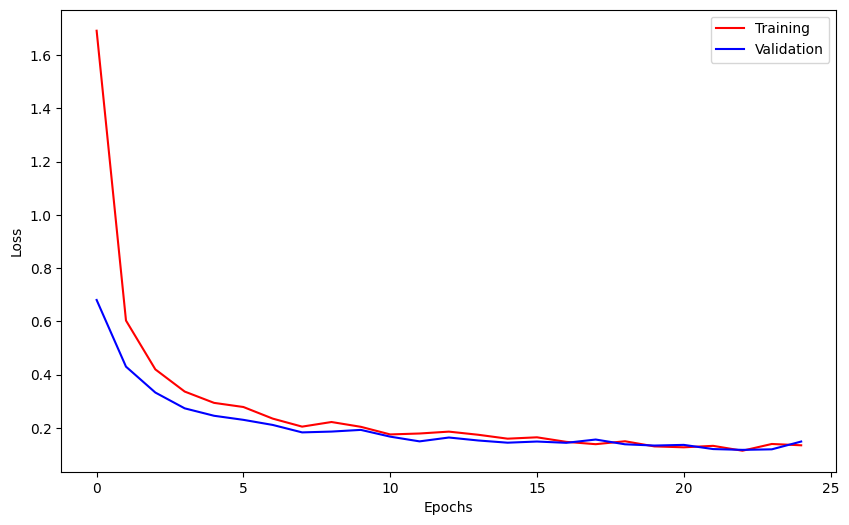

In [15]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

fig = plt.figure(figsize=(10,6))
plt.plot(epochs,loss,c="red",label="Training")
plt.plot(epochs,val_loss,c="blue",label="Validation")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

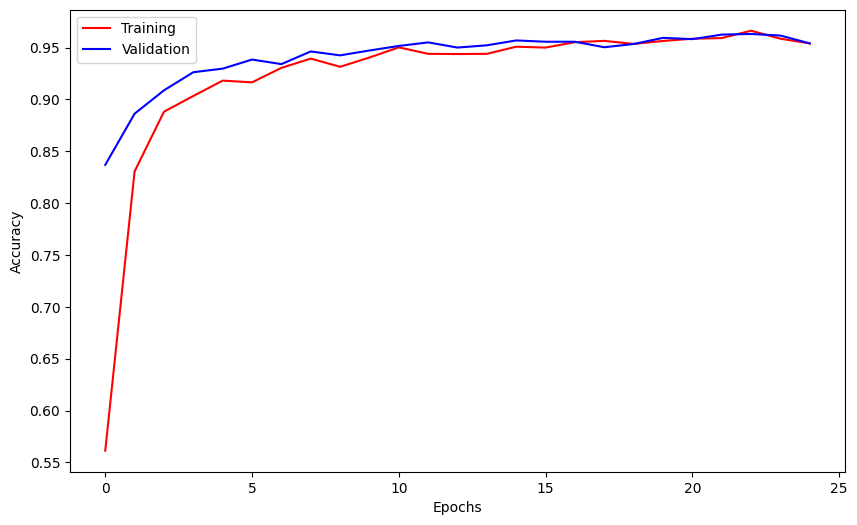

In [16]:
acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']

epochs = range(len(acc))

fig = plt.figure(figsize=(10,6))
plt.plot(epochs,acc,c="red",label="Training")
plt.plot(epochs,val_acc,c="blue",label="Validation")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

In [17]:
model.save('plant_disease')

INFO:tensorflow:Assets written to: plant_disease\assets


INFO:tensorflow:Assets written to: plant_disease\assets


In [18]:
import tensorflow as tf

# Convert the model
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TFLite model
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\Admin\AppData\Local\Temp\tmp1hz80o5l\assets


INFO:tensorflow:Assets written to: C:\Users\Admin\AppData\Local\Temp\tmp1hz80o5l\assets
